## Fahri Ulkat
## 090220756

<section id="question-4" class="level1">
<h1>Question 4</h1>
<p>Use R or Python to answer the following question. Your answer should include all code and outputs. The dataset is provided in the file <code>Growth.xlsx</code>, containing data on average growth rates from 1960 through 1995 for 65 countries, along with variables potentially related to growth. A detailed description is available in the <code>Growth_Description.pdf</code> file. In this exercise, you will explore the relationship between growth and trade.</p>
<ol type="a">
<li><p>Construct a scatterplot of average annual growth rate (<code>growth</code>) on the average trade share (<code>tradeshare</code>). Does there appear to be a relationship between the variables?</p></li>
<li><p>One country, Malta, has a trade share much larger than the other countries. Find Malta on the scatterplot. Does Malta look like an outlier?</p></li>
<li><p>Using all observations, run a regression of <code>growth</code> on <code>tradeshare</code>. What is the estimated slope? What is the estimated intercept? Use the regression to predict the growth rate for a country with a trade share of 0.5 and for another with a trade share equal to 1.0.</p></li>
<li><p>Estimate the same regression, excluding the data from Malta. Answer the same questions in (c).</p></li>
<li><p>Plot the estimated regression functions from (c) and (d). Using the scatterplot in (a), explain why the regression function that includes Malta is steeper than the regression function that excludes Malta.</p></li>
<li><p>Where is Malta? Why is the Malta trade share so large? Should Malta be included or excluded from the analysis?</p></li>
</ol>
</section>

Solutions for a:

In [17]:
#import the libraries

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore", UserWarning)

In [18]:
#%pip install openpyxl
data = pd.read_excel("Growth.xlsx")
data.head()

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333


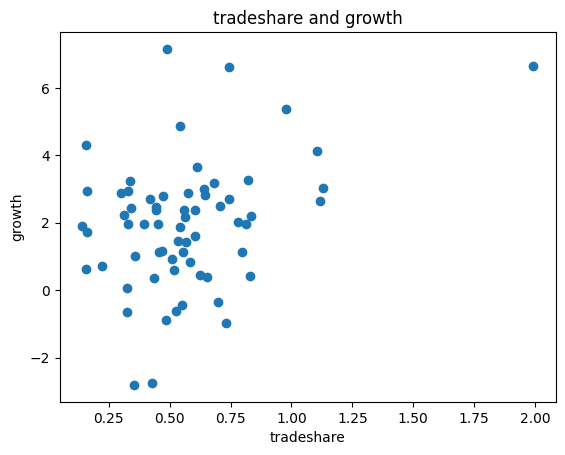

In [19]:
plt.scatter(x = data['tradeshare'], y = data['growth'] )
plt.xlabel('tradeshare')
plt.ylabel('growth')
plt.title('tradeshare and growth')
plt.show()

There looks like a positive relationship between tradeshare and growth.

Solutions for b:

In [20]:
data[data['country_name'] == 'Malta']

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
64,Malta,6.652838,0,1374.0,1.992616,5.64,0.0,0.0


Text(0.5, 1.0, 'Scatter Plot with Malta Highlighted')

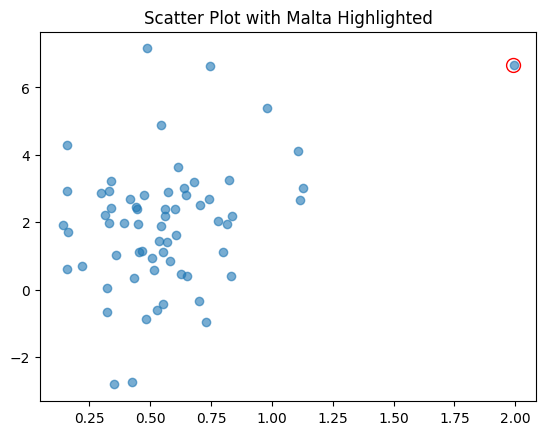

In [21]:
malta_data = data[data['country_name'] == 'Malta']
plt.scatter(data['tradeshare'], data['growth'], alpha=0.6)
plt.scatter(malta_data['tradeshare'], malta_data['growth'], color='red', marker='o', label='Malta', s=100, edgecolors='red', facecolors='none')
plt.title('Scatter Plot with Malta Highlighted')

Solution for c:

In [22]:
regr = LinearRegression()
regr.fit(data[['tradeshare']], data[['growth']])

slope = regr.coef_
intercept = regr.intercept_

print(f"The estimaded slope is: {slope} \nThe estimated intercept is: {intercept}")

The estimaded slope is: [[2.30643374]] 
The estimated intercept is: [0.64026527]


In [23]:


prediction_X = pd.DataFrame({0.5, 1})

prediction_y = regr.predict(prediction_X)
prediction_y
prediction1 = prediction_y[0][0]
prediction2 = prediction_y[1][0]
print(f"The predicted value for 0.5: {prediction1} \nThe predicted value for 1: {prediction2}")

The predicted value for 0.5: 1.793482144006488 
The predicted value for 1: 2.946699013617626


Solution for d:

In [24]:
# drop the row where country_name = Malta
new_data = data.drop(data[data['country_name'] == "Malta"].index)

In [25]:
new_regr = LinearRegression()

new_slope = regr.coef_
new_intercept = regr.intercept_

print(f"The estimaded slope is: {new_slope} \nThe estimated intercept is: {new_intercept}")

new_regr.fit(new_data[['tradeshare']], new_data[['growth']])
prediction_X = pd.DataFrame({0.5, 1})
prediction_y_2 = new_regr.predict(prediction_X)
prediction3 = prediction_y_2[0][0]
prediction4 = prediction_y_2[1][0]

print(f"The predicted value for 0.5: {prediction3} \nThe predicted value for 1: {prediction4}")


The estimaded slope is: [[2.30643374]] 
The estimated intercept is: [0.64026527]
The predicted value for 0.5: 1.7978630007306473 
The predicted value for 1: 2.6383153322579123


Solution for e:

In [26]:
y_pred_with_malta = regr.predict(data[['tradeshare']])
y_pred_without_malta = new_regr.predict(new_data[['tradeshare']])

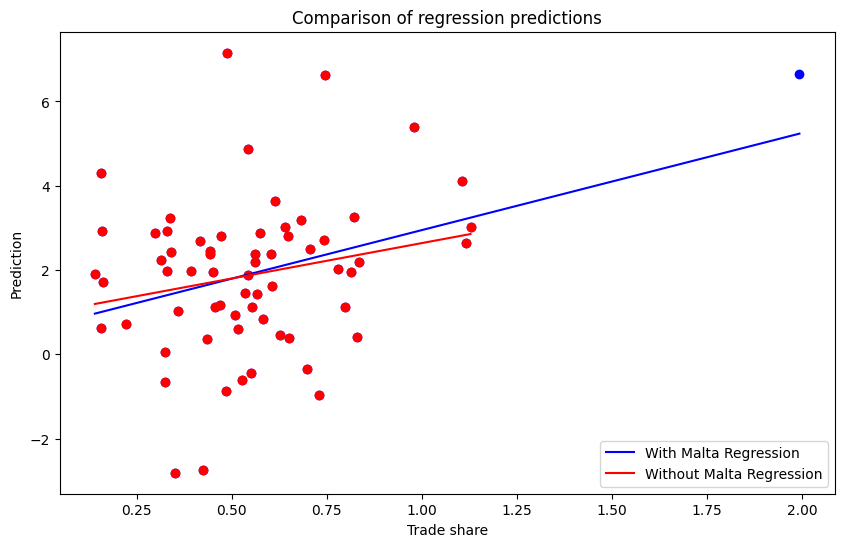

In [27]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

plt.scatter(data['tradeshare'], data['growth'], color='blue')
plt.scatter(new_data['tradeshare'], new_data['growth'], color='red')

plt.plot(data['tradeshare'], y_pred_with_malta, label='With Malta Regression', color='b')
plt.plot(new_data['tradeshare'], y_pred_without_malta, label='Without Malta Regression', color='r')


plt.xlabel('Trade share')
plt.ylabel('Prediction')
plt.title('Comparison of regression predictions')

plt.legend()
plt.show()


Blue line is steeper because regression tried to fit Malta point which is a outlier. However, red line ends around 1.25 and it didn't fit for malta point.

Solution for f:

Malta is an island located in Mediterranean, south of Italy. 

The high level of trading in Malta is due to its favourable tax regime, strategic location within the EU and strong financial infrastructure. These factors attract international investors, brokers and financial institutions, making it an attractive centre for equity trading and financial services within Europe.

I think Malta is an exception and it shouldn't be included in this analysis. However, to detemine exclude or not we need analysis with furter details. We should test the model with different scenarios.
